## Image Classification: FFNN vs CNN

In [1]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
from numpy.random import seed
seed(1)
tf.random.set_seed(1)

import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from numpy import asarray
from helper import plot_history

2023-03-09 04:50:35.877302: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Initialise an image generator object
generator = ImageDataGenerator(rescale=1./255)

# Initialising number of data images
num_data = len(os.listdir('data/pavlos') + os.listdir('data/not_pavlos'))

# Read the image data from the directory using the generator object
img_generator = generator.flow_from_directory(directory="data/", color_mode='rgb', seed=1,
                                    batch_size=16, target_size=(150, 150), class_mode='binary')

# Print the target size i.e. the total dataset size
TARGET_SIZE = img_generator.target_size
print(f'Generator produces images of size {TARGET_SIZE} (with 3 color channels)')

# Print the batch size
BATCH_SIZE = img_generator.batch_size
print(f'Images are generated in batches of size {BATCH_SIZE}')


Found 100 images belonging to 2 classes.
Generator produces images of size (150, 150) (with 3 color channels)
Images are generated in batches of size 16


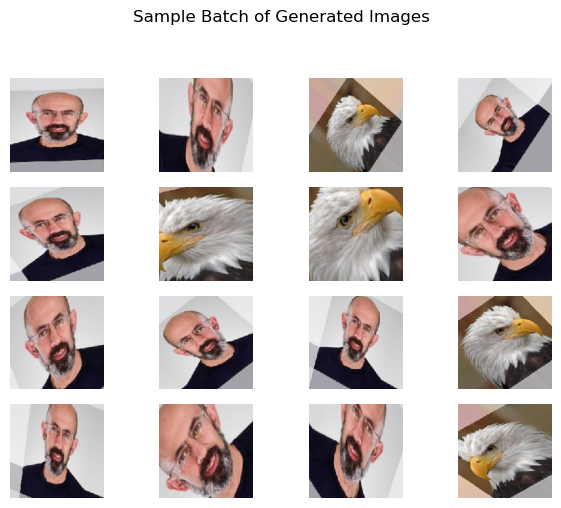

In [3]:
# Plotting a sample of the generated images 
sample_batch = img_generator.next()[0]
fig, ax = plt.subplots(4,4)
ax = ax.ravel()
for i, img in enumerate(sample_batch):
    ax[i].set_axis_off()
    ax[i].imshow(img)
plt.suptitle('Sample Batch of Generated Images', y=1.05)
plt.tight_layout()

### Feed-Forward Neural Network

Our first network will be a feed-forward neural network. The only layers with learned parameters we will be using are dense layers.

In [4]:
# Fixing the random seed
seed(1)
tf.random.set_seed(1)

# Creating a feed-forward Neural Network
FFNN = Sequential()

# Specify a layer that takes the input with input shape
# the same as the TARGET_SIZE defined during image generation
FFNN.add(Input(shape=(150, 150, 3)))

# Add a flatten layer to enable FFNN to process images
FFNN.add(Flatten()) 

# Specify a list of the number of nodes for each dense layer
ffnn_filters = [256,256,256]

# Add dense layers for the number of nodes in ffnn_filters with ReLU activation
for n_nodes in ffnn_filters:
    FFNN.add(Dense(n_nodes,activation='relu'))

# Add the final dense layer with 1 output node to differentiate 
# between the two classes and sigmoid activation
FFNN.add(Dense(1, activation='sigmoid'))

# Compile the model with accuracy as the metric and adam optimizer
FFNN.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

2023-03-09 04:50:45.094008: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-09 04:50:45.094479: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
# Print a summary of the model and observe the total number of parameters
FFNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 256)               17280256  
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 17,412,097
Trainable params: 17,412,097
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Train the model
FFNN_history = FFNN.fit(
        img_generator,
        steps_per_epoch=num_data// BATCH_SIZE,
        epochs=10, shuffle=False, workers=0,
        validation_data=img_generator,
        validation_steps=num_data*0.25// BATCH_SIZE)

Epoch 1/10
6/6 [==============================] - 2s 152ms/step - loss: 8.1721 - accuracy: 0.4167 - val_loss: 3.6085 - val_accuracy: 0.3125
Epoch 2/10
6/6 [==============================] - 1s 155ms/step - loss: 0.6027 - accuracy: 0.8438 - val_loss: 0.1257 - val_accuracy: 0.8750
Epoch 3/10
6/6 [==============================] - 1s 127ms/step - loss: 0.8212 - accuracy: 0.7708 - val_loss: 1.3713 - val_accuracy: 0.7500
Epoch 4/10
6/6 [==============================] - 1s 125ms/step - loss: 2.3561 - accuracy: 0.6667 - val_loss: 5.6237 - val_accuracy: 0.5000
Epoch 5/10
6/6 [==============================] - 1s 128ms/step - loss: 3.9160 - accuracy: 0.6042 - val_loss: 2.1230e-05 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 1s 141ms/step - loss: 1.2912 - accuracy: 0.8542 - val_loss: 1.6538 - val_accuracy: 0.6875
Epoch 7/10
6/6 [==============================] - 1s 135ms/step - loss: 0.3062 - accuracy: 0.9375 - val_loss: 1.3464e-04 - val_accuracy: 1.0000
Epoch 8/10
6

### ⏸ Enter the number of parameters in the given FFNN architecture.

In [7]:
### edTest(test_chow1) ###

# Enter the answer by typing in a number in the space provided
answer1 = '405047'

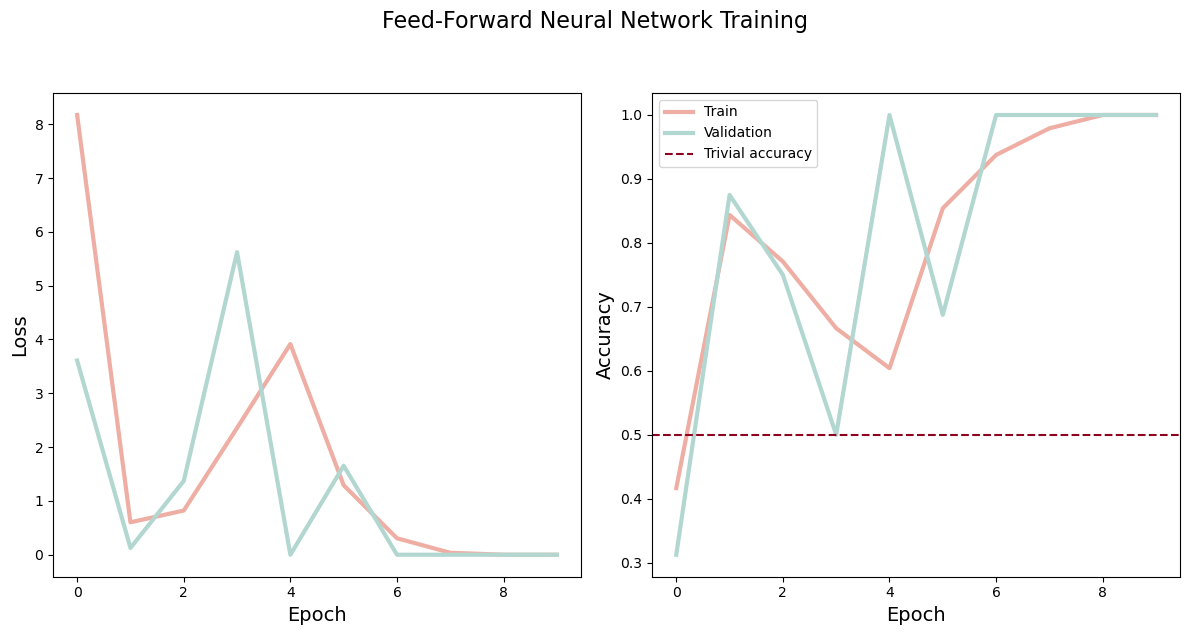

In [8]:
# Use the plot history function from the helper file to plot the data
plot_history(FFNN_history, 'Feed-Forward Neural Network')

In [9]:
### edTest(test_ffnn_acc) ###

# Evaluate your model
FFNN_loss, FFNN_acc = FFNN.evaluate(img_generator, steps=2)
print(f'FFNN Accuracy: {FFNN_acc}')

2/2 [==============================] - 0s 20ms/step - loss: 3.9858e-04 - accuracy: 1.0000
FFNN Accuracy: 1.0


### ⏸ Alter the network architecture by increasing the number of nodes and/or layers. Enter the number of parameters of the network that gives a validation accuracy of above 80%.

In [10]:
### edTest(test_chow2) ###

# Enter the answer by typing in a number in the space provided
answer2 = '17412097'

### Convolutional Neural Network

In [14]:
### edTest(test_cnn_count_param) ###

# Fixing the random seed
seed(1)
tf.random.set_seed(1)

# Creating a CNN
CNN = Sequential()

# Add a layer to take the input with shape (150,150,3)
CNN.add(Input(shape=(150, 150, 3)))

# Specify a list of the number of filters for each convolutional layer
cnn_filters = [8,8,8,8,8]

# Add convolutional layers with number of filters in cnn_filters
# With kernel size as 3, stride of 2 and relu activation
for n_filters in cnn_filters:
    CNN.add(Conv2D(n_filters,strides=(2, 2), kernel_size=3, activation='relu'))

# Add the flatten layer between the CNN and dense layer
CNN.add(Flatten())

# Add a dense layer with 64 nodes with relu activation
CNN.add(Dense(64, activation='relu'))
 
# Specify the output layer with sigmoid activation and one node
CNN.add(Dense(1, activation='sigmoid'))
 
# Compile the model with accuracy as the metric and adam optimizer
CNN.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [15]:
# Print a summary of the model and observe the total number of parameters
CNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 74, 74, 8)         224       
                                                                 
 conv2d_5 (Conv2D)           (None, 36, 36, 8)         584       
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 8)         584       
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 8)           584       
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 8)           584       
                                                                 
 flatten_2 (Flatten)         (None, 72)                0         
                                                                 
 dense_6 (Dense)             (None, 64)               

### ⏸ Enter the number of parameters in the given CNN architecture.


In [13]:
### edTest(test_chow3) ###
# Enter the answer by typing in a number in the space provided
answer3 = '7297'

In [15]:
# Fit the model on the image generator
CNN_history = CNN.fit(
        img_generator,
        steps_per_epoch=num_data // BATCH_SIZE,
        epochs=10, shuffle=False, workers=0,
        validation_data=img_generator,
        validation_steps=num_data*0.25// BATCH_SIZE)

Epoch 1/10
6/6 [==============================] - 0s 35ms/step - loss: 0.6905 - accuracy: 0.6354 - val_loss: 0.6817 - val_accuracy: 0.9375
Epoch 2/10
6/6 [==============================] - 1s 107ms/step - loss: 0.6731 - accuracy: 0.8542 - val_loss: 0.6435 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 0s 18ms/step - loss: 0.6277 - accuracy: 0.9792 - val_loss: 0.5762 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 0s 16ms/step - loss: 0.5167 - accuracy: 1.0000 - val_loss: 0.4241 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 0s 15ms/step - loss: 0.3245 - accuracy: 0.9896 - val_loss: 0.2153 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 0s 15ms/step - loss: 0.1265 - accuracy: 1.0000 - val_loss: 0.0458 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 16ms/step - loss: 0.0314 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 8/10
6/6 [==========

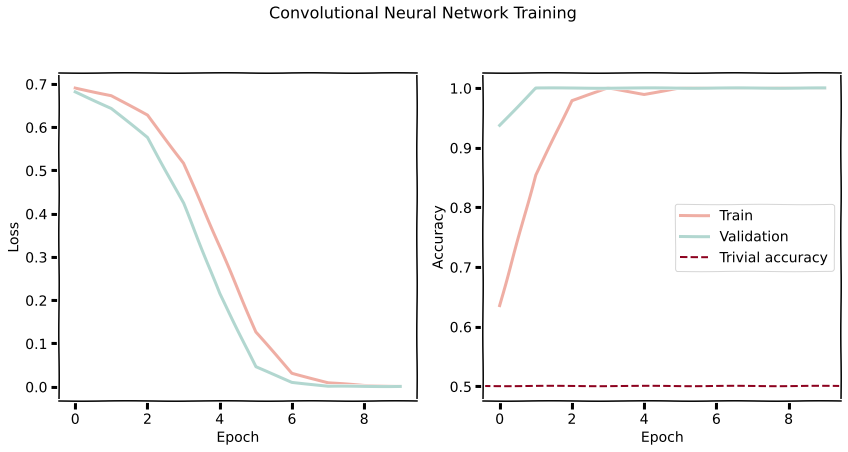

In [16]:
# Plot the history of the model
plot_history(CNN_history, 'Convolutional Neural Network')

In [17]:
### edTest(test_cnn_acc) ###

# Evaluate the model on the entire data
CNN_loss, CNN_acc = CNN.evaluate(img_generator, steps=2)
print(f'CNN Test Accuracy: {CNN_acc}')

2/2 [==============================] - 0s 10ms/step - loss: 7.3076e-04 - accuracy: 1.0000
CNN Test Accuracy: 1.0


### ⏸ Remove the last layer in the Convolution Neural Network defined above. How does this affect the number of parameters?

#### A. The number of parameters decrease.
#### B. The number of parameters increase.
#### C. The number of parameters remains the same. 


In [18]:
### edTest(test_chow4) ###

# Enter the answer by typing in a number in the space provided
answer4 = 'B'